In [4]:
import gensim, logging, numpy as np
import help_functions as hf
import nltk
import matplotlib.pyplot as plt
import matplotlib

In [5]:
def word2vec(dim):
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    lemmatizer = nltk.WordNetLemmatizer() # create a lemmatizer

    sentences = []
    file = open("lemmatized.text", "r")

    for line in file: # read the file and create list which contains all sentences found in the text
        sentences.append(line.split())
    # train word2vec on the two sentences

    dimension = dim # parameter for Word2vec size of vectors for word embedding

    threshold = 0.00055 # parameter for Word2vec


    sum = 0.0

    # 
    model = gensim.models.Word2Vec(sentences, min_count=1, sample=threshold, sg=1,vector_size=dimension) # create model using Word2Ve with the given parameters
    #
    print(len(model.wv.key_to_index)) # check the length of the vocabulary which was formed by Word2Vec

    #The rest implements passing TOEFL tests
    i = 0 #counter for TOEFL tests
    number_of_tests = 80
    text_file = open('new_toefl.txt', 'r')
    right_answers = 0 # variable for correct answers
    number_skipped_tests = 0 # some tests could be skipped if there are no corresponding words in the vocabulary extracted from the training corpus
    while i < number_of_tests:
        line = text_file.readline() #read line in the file
        words = line.split() # extract words from the line
        try:
            words = [lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, 'v'), 'n'), 'a') for word in
                        words] # lemmatize words in the current test
            vectors = []
            if words[0] in model.wv: # check if there embedding for the query word
                k = 1 #counter for loop iterating over 5 words in the test
                vectors.append(model.wv[words[0]])
                while k < 5:
                    if words[k] in model.wv: # if alternative has the embedding
                        vectors.append(model.wv[words[k]]) #assing the learned vector
                    else: 
                        vectors.append(np.random.randn(dimension)) #assing random vector
                    k += 1
                right_answers += hf.get_answer_mod(vectors) #find the closest vector and check if it is the correct answer

        except KeyError: # if there is no representation for the query vector than skip
            number_skipped_tests += 1
            print("skipped test: " + str(i) + "; Line: " + str(words))
        except IndexError:
            print(i)
            print(line)
            print(words)
            break
        i += 1
    text_file.close()
    sum += 100 * float(right_answers) / float(number_of_tests) #get the percentage
    print("Threshold freq = "+ str(threshold)+" Percentage of correct answers: " + str(sum) + "%")
    return sum

def plot_dimensionality_vs_accuracies(dict):
    points = len(next(iter(dict.values())))
    colors = matplotlib.cm.rainbow(np.linspace(0, 1, points))
    color_index = 0
    for dimension in dict.keys():
        for simulation in dict[dimension]:
            print("Dimension", dimension, "with Accuracy", simulation)
            plt.scatter(dimension, simulation, color=colors[color_index])
            color_index += 1
        color_index = 0
    plt.title('Dimensionality vs Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Dimensions')
    plt.ylim(0, 100)
    plt.show()
    

def run_several_dimensions(dimensions, simulations):
    accuracies = {}
    for dimension in dimensions:
        tempdict = []
        for simulation in range(simulations):
            accuracy = word2vec(dimension)
            tempdict.append(accuracy)
        accuracies[dimension] = np.array(tempdict)
    return accuracies

2023-11-07 17:50:46,761 : INFO : collecting all words and their counts
2023-11-07 17:50:46,763 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-11-07 17:50:46,788 : INFO : PROGRESS: at sentence #10000, processed 112555 words, keeping 6354 word types
2023-11-07 17:50:46,836 : INFO : PROGRESS: at sentence #20000, processed 254983 words, keeping 10821 word types
2023-11-07 17:50:46,866 : INFO : PROGRESS: at sentence #30000, processed 367772 words, keeping 12635 word types
2023-11-07 17:50:46,954 : INFO : PROGRESS: at sentence #40000, processed 566573 words, keeping 17685 word types
2023-11-07 17:50:47,034 : INFO : PROGRESS: at sentence #50000, processed 724294 words, keeping 20496 word types
2023-11-07 17:50:47,095 : INFO : PROGRESS: at sentence #60000, processed 869309 words, keeping 22253 word types
2023-11-07 17:50:47,141 : INFO : PROGRESS: at sentence #70000, processed 1006992 words, keeping 23483 word types
2023-11-07 17:50:47,180 : INFO : PROGRESS: at 

70583
Threshold freq = 0.00055 Percentage of correct answers: 51.25%


2023-11-07 17:52:11,631 : INFO : collecting all words and their counts
2023-11-07 17:52:11,633 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-11-07 17:52:11,657 : INFO : PROGRESS: at sentence #10000, processed 112555 words, keeping 6354 word types
2023-11-07 17:52:11,695 : INFO : PROGRESS: at sentence #20000, processed 254983 words, keeping 10821 word types
2023-11-07 17:52:11,724 : INFO : PROGRESS: at sentence #30000, processed 367772 words, keeping 12635 word types
2023-11-07 17:52:11,771 : INFO : PROGRESS: at sentence #40000, processed 566573 words, keeping 17685 word types
2023-11-07 17:52:11,819 : INFO : PROGRESS: at sentence #50000, processed 724294 words, keeping 20496 word types
2023-11-07 17:52:11,859 : INFO : PROGRESS: at sentence #60000, processed 869309 words, keeping 22253 word types
2023-11-07 17:52:11,900 : INFO : PROGRESS: at sentence #70000, processed 1006992 words, keeping 23483 word types
2023-11-07 17:52:11,938 : INFO : PROGRESS: at 

70583
Threshold freq = 0.00055 Percentage of correct answers: 53.75%


2023-11-07 17:53:29,044 : INFO : collecting all words and their counts
2023-11-07 17:53:29,045 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-11-07 17:53:29,068 : INFO : PROGRESS: at sentence #10000, processed 112555 words, keeping 6354 word types
2023-11-07 17:53:29,103 : INFO : PROGRESS: at sentence #20000, processed 254983 words, keeping 10821 word types
2023-11-07 17:53:29,135 : INFO : PROGRESS: at sentence #30000, processed 367772 words, keeping 12635 word types
2023-11-07 17:53:29,181 : INFO : PROGRESS: at sentence #40000, processed 566573 words, keeping 17685 word types
2023-11-07 17:53:29,220 : INFO : PROGRESS: at sentence #50000, processed 724294 words, keeping 20496 word types
2023-11-07 17:53:29,254 : INFO : PROGRESS: at sentence #60000, processed 869309 words, keeping 22253 word types
2023-11-07 17:53:29,289 : INFO : PROGRESS: at sentence #70000, processed 1006992 words, keeping 23483 word types
2023-11-07 17:53:29,325 : INFO : PROGRESS: at 

70583
Threshold freq = 0.00055 Percentage of correct answers: 50.0%


2023-11-07 17:54:45,876 : INFO : collecting all words and their counts
2023-11-07 17:54:45,878 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-11-07 17:54:45,903 : INFO : PROGRESS: at sentence #10000, processed 112555 words, keeping 6354 word types
2023-11-07 17:54:45,936 : INFO : PROGRESS: at sentence #20000, processed 254983 words, keeping 10821 word types
2023-11-07 17:54:45,967 : INFO : PROGRESS: at sentence #30000, processed 367772 words, keeping 12635 word types
2023-11-07 17:54:46,013 : INFO : PROGRESS: at sentence #40000, processed 566573 words, keeping 17685 word types
2023-11-07 17:54:46,053 : INFO : PROGRESS: at sentence #50000, processed 724294 words, keeping 20496 word types
2023-11-07 17:54:46,088 : INFO : PROGRESS: at sentence #60000, processed 869309 words, keeping 22253 word types
2023-11-07 17:54:46,121 : INFO : PROGRESS: at sentence #70000, processed 1006992 words, keeping 23483 word types
2023-11-07 17:54:46,158 : INFO : PROGRESS: at 

70583
Threshold freq = 0.00055 Percentage of correct answers: 72.5%


2023-11-07 17:57:12,592 : INFO : collecting all words and their counts
2023-11-07 17:57:12,593 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-11-07 17:57:12,620 : INFO : PROGRESS: at sentence #10000, processed 112555 words, keeping 6354 word types
2023-11-07 17:57:12,651 : INFO : PROGRESS: at sentence #20000, processed 254983 words, keeping 10821 word types
2023-11-07 17:57:12,677 : INFO : PROGRESS: at sentence #30000, processed 367772 words, keeping 12635 word types
2023-11-07 17:57:12,717 : INFO : PROGRESS: at sentence #40000, processed 566573 words, keeping 17685 word types
2023-11-07 17:57:12,754 : INFO : PROGRESS: at sentence #50000, processed 724294 words, keeping 20496 word types
2023-11-07 17:57:12,787 : INFO : PROGRESS: at sentence #60000, processed 869309 words, keeping 22253 word types
2023-11-07 17:57:12,829 : INFO : PROGRESS: at sentence #70000, processed 1006992 words, keeping 23483 word types
2023-11-07 17:57:12,871 : INFO : PROGRESS: at 

70583
Threshold freq = 0.00055 Percentage of correct answers: 70.0%


2023-11-07 17:59:29,049 : INFO : collecting all words and their counts
2023-11-07 17:59:29,051 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-11-07 17:59:29,077 : INFO : PROGRESS: at sentence #10000, processed 112555 words, keeping 6354 word types
2023-11-07 17:59:29,111 : INFO : PROGRESS: at sentence #20000, processed 254983 words, keeping 10821 word types
2023-11-07 17:59:29,138 : INFO : PROGRESS: at sentence #30000, processed 367772 words, keeping 12635 word types
2023-11-07 17:59:29,179 : INFO : PROGRESS: at sentence #40000, processed 566573 words, keeping 17685 word types
2023-11-07 17:59:29,215 : INFO : PROGRESS: at sentence #50000, processed 724294 words, keeping 20496 word types
2023-11-07 17:59:29,247 : INFO : PROGRESS: at sentence #60000, processed 869309 words, keeping 22253 word types
2023-11-07 17:59:29,279 : INFO : PROGRESS: at sentence #70000, processed 1006992 words, keeping 23483 word types
2023-11-07 17:59:29,311 : INFO : PROGRESS: at 

70583
Threshold freq = 0.00055 Percentage of correct answers: 67.5%


2023-11-07 18:01:46,959 : INFO : collecting all words and their counts
2023-11-07 18:01:46,960 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-11-07 18:01:46,987 : INFO : PROGRESS: at sentence #10000, processed 112555 words, keeping 6354 word types
2023-11-07 18:01:47,022 : INFO : PROGRESS: at sentence #20000, processed 254983 words, keeping 10821 word types
2023-11-07 18:01:47,049 : INFO : PROGRESS: at sentence #30000, processed 367772 words, keeping 12635 word types
2023-11-07 18:01:47,095 : INFO : PROGRESS: at sentence #40000, processed 566573 words, keeping 17685 word types
2023-11-07 18:01:47,135 : INFO : PROGRESS: at sentence #50000, processed 724294 words, keeping 20496 word types
2023-11-07 18:01:47,176 : INFO : PROGRESS: at sentence #60000, processed 869309 words, keeping 22253 word types
2023-11-07 18:01:47,208 : INFO : PROGRESS: at sentence #70000, processed 1006992 words, keeping 23483 word types
2023-11-07 18:01:47,240 : INFO : PROGRESS: at 

70583
Threshold freq = 0.00055 Percentage of correct answers: 71.25%


2023-11-07 18:15:02,860 : INFO : collecting all words and their counts
2023-11-07 18:15:02,862 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-11-07 18:15:02,899 : INFO : PROGRESS: at sentence #10000, processed 112555 words, keeping 6354 word types
2023-11-07 18:15:02,932 : INFO : PROGRESS: at sentence #20000, processed 254983 words, keeping 10821 word types
2023-11-07 18:15:02,959 : INFO : PROGRESS: at sentence #30000, processed 367772 words, keeping 12635 word types
2023-11-07 18:15:03,004 : INFO : PROGRESS: at sentence #40000, processed 566573 words, keeping 17685 word types
2023-11-07 18:15:03,038 : INFO : PROGRESS: at sentence #50000, processed 724294 words, keeping 20496 word types
2023-11-07 18:15:03,075 : INFO : PROGRESS: at sentence #60000, processed 869309 words, keeping 22253 word types
2023-11-07 18:15:03,110 : INFO : PROGRESS: at sentence #70000, processed 1006992 words, keeping 23483 word types
2023-11-07 18:15:03,144 : INFO : PROGRESS: at 

70583
Threshold freq = 0.00055 Percentage of correct answers: 72.5%


2023-11-07 18:27:34,093 : INFO : collecting all words and their counts
2023-11-07 18:27:34,095 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-11-07 18:27:34,120 : INFO : PROGRESS: at sentence #10000, processed 112555 words, keeping 6354 word types
2023-11-07 18:27:34,155 : INFO : PROGRESS: at sentence #20000, processed 254983 words, keeping 10821 word types
2023-11-07 18:27:34,182 : INFO : PROGRESS: at sentence #30000, processed 367772 words, keeping 12635 word types
2023-11-07 18:27:34,225 : INFO : PROGRESS: at sentence #40000, processed 566573 words, keeping 17685 word types
2023-11-07 18:27:34,260 : INFO : PROGRESS: at sentence #50000, processed 724294 words, keeping 20496 word types
2023-11-07 18:27:34,296 : INFO : PROGRESS: at sentence #60000, processed 869309 words, keeping 22253 word types
2023-11-07 18:27:34,329 : INFO : PROGRESS: at sentence #70000, processed 1006992 words, keeping 23483 word types
2023-11-07 18:27:34,362 : INFO : PROGRESS: at 

70583
Threshold freq = 0.00055 Percentage of correct answers: 71.25%
Dimension 10 with Accuracy 51.25
Dimension 10 with Accuracy 53.75
Dimension 10 with Accuracy 50.0
Dimension 100 with Accuracy 72.5
Dimension 100 with Accuracy 70.0
Dimension 100 with Accuracy 67.5
Dimension 1000 with Accuracy 71.25
Dimension 1000 with Accuracy 72.5
Dimension 1000 with Accuracy 71.25


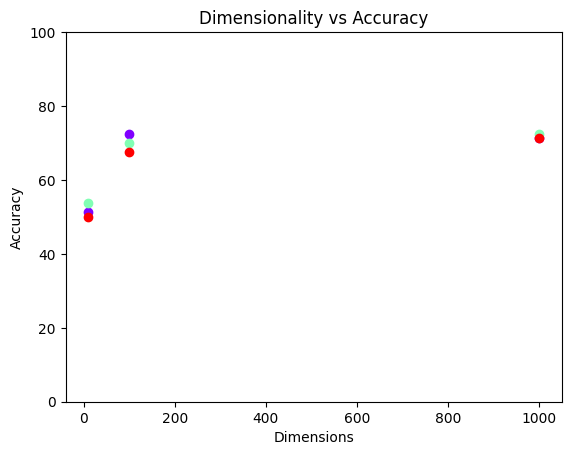

In [6]:
plot_dimensionality_vs_accuracies(run_several_dimensions([10,100,1000], 3))

# Word2Vec

## Report the accuracy on TOEFL for all simulations
See the plot and the specified values above it.

## Elaborate how accuracy changes with the dimensionality
The accuracy seems to taper off the higher dimensions go. The biggest increase seems to be around 0->100. It settles at around 70%. Higher dimensionality seemed to affect how many of the test runs converged to around 70%. Seen from plot where more dots are closer together at dimension 1000 compared to dimension 100.

## Word2Vec compared to RI
Compared to RI it had less variation on the results for the a given dimensionality. In our results it seems that Word2Vec performed better in terms of variation on dimension 1000. Word2Vec took longer for us. 5 epochs for each simulation for one dimension.